<a href="https://colab.research.google.com/github/sohdacafe/Machine_Learning/blob/main/kaggle_titanic_feature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('gender_submission.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Survivedの集計
ttl_cont = df_train['Survived'].count()
Dead_cont = df_train[df_train['Survived']==0]['Survived'].sum()
Surv_cont = df_train[df_train['Survived']==1]['Survived'].sum()

Survived
0    549
1    342
Name: Survived, dtype: int64


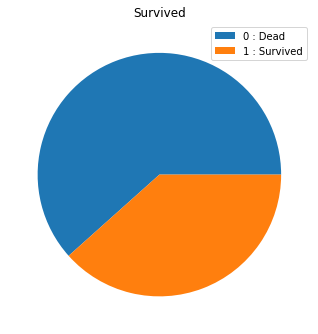

In [23]:
ttl_surv = df_train.groupby('Survived')['Survived'].count()
print(df_ttl_surv)
plt.figure(figsize=(12,6))
plt,plt.subplot(121)
plt.pie(ttl_surv)
plt.title('Survived')
suv_label = ['0 : Dead','1 : Survived']
plt.legend(loc=1, labels = suv_label)
plt.show()

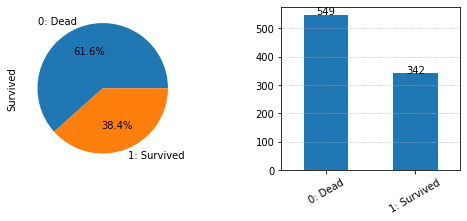

In [89]:
# Survivedをグラフ出力
DICT_SURVIVED = {0: '0: Dead', 1: '1: Survived'}

def arrange_bar(ax, sr):
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=30, horizontalalignment="center")
    ax.grid(axis='y', linestyle='dotted')
    [ax.text(i, count, count, horizontalalignment='center') for i, count in enumerate(sr)]

sr_survived = df_train['Survived'].value_counts().rename(DICT_SURVIVED)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
sr_survived.plot.pie(autopct="%1.1f%%", ax=axes[0])
sr_survived.plot.bar(ax=axes[1])

arrange_bar(axes[1], sr_survived)

plt.show()

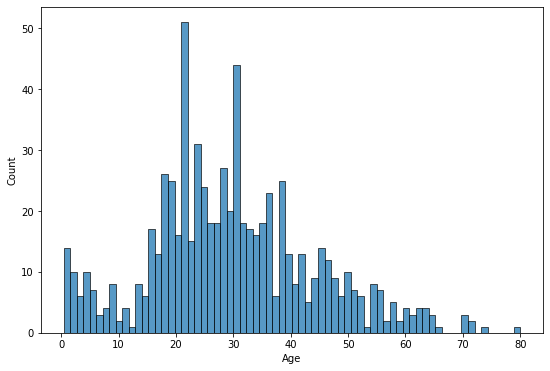

In [22]:
# 年齢別にヒストグラム作成
plt.figure(figsize=(9,6))
sns.histplot(x=df_train['Age'], data=df_train, multiple='stack',bins=70)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


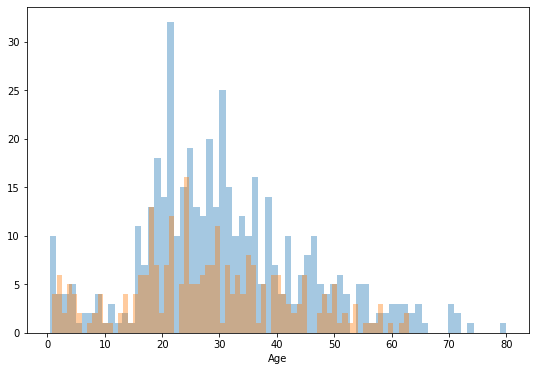

In [25]:
# 性別に年齢ヒストグラム作成
plt.figure(figsize=(9,6))
sns.distplot(df_train[df_train['Sex']=='male']['Age'], bins=70, kde=False)
sns.distplot(df_train[df_train['Sex']=='female']['Age'], bins=70, kde=False)
plt.show()

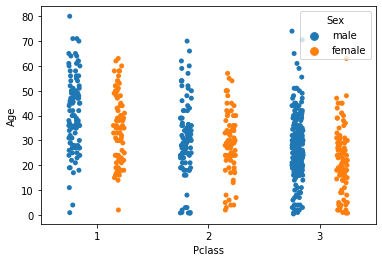

In [64]:
# scatter(strip)plot
sns.stripplot(data=df_train,x="Pclass",y="Age",hue="Sex",dodge=True)

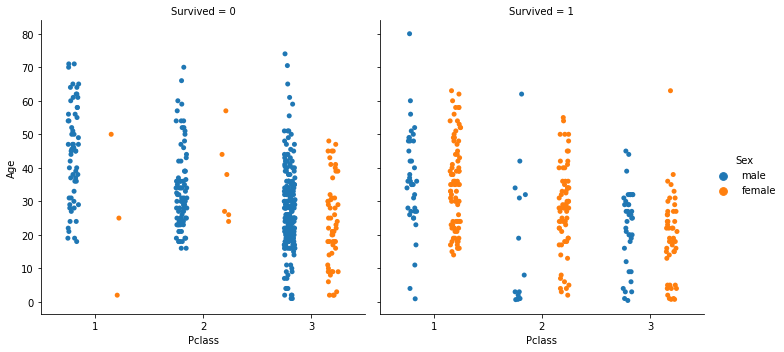

In [66]:
# catplotのオプションcolを指定し、複数のグラフに分けて表示
sns.catplot(data=df_train,kind="strip",x="Pclass",y="Age",hue="Sex",col="Survived",dodge=True)

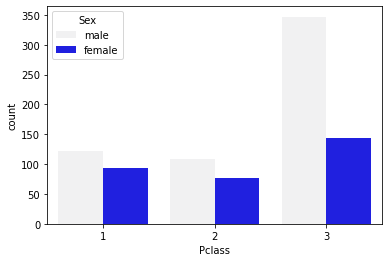

In [70]:
# countplot, カテゴリ別に乗客数をカウント
sns.countplot(data=df_train,x="Pclass",hue="Sex",color="b")

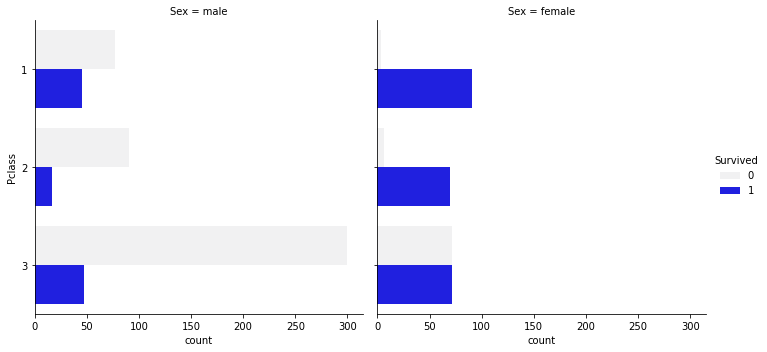

In [71]:
sns.catplot(data=df_train,kind="count",y="Pclass",col="Sex",hue="Survived",color="b")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


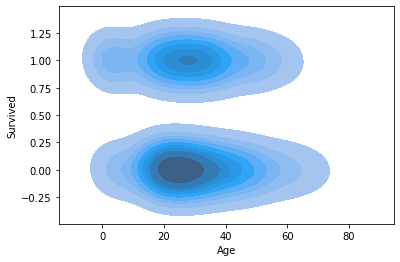

In [73]:
sns.kdeplot(df_train['Age'],df_train['Survived'],shade=True)